# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений


Выполнили студенты гр. 2381 Соколов Сергей Александрович и Тищенко Артем Михайлович. Вариант №2.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения


В работе будут проанализированы следующие фильтры:
- Линейный по 5 точкам:
  - $y(n) = \frac{1}{5}\sum_{k = n - 2} ^ {n + 2} x_k $
  - $H(\omega) = \frac{1}{5} (1 + 2 \cos(\omega) + 2 \cos(2\omega))$

- Линейный по 9 точкам:
  - $y(n) = \frac{1}{9}\sum_{k = n - 4} ^ {n + 4} x_k $
  - $H(\omega) = \frac{1}{9} (1 + 2 \cos(\omega) + 2 \cos(2\omega) + 2 \cos(3\omega)+ 2 \cos(4\omega))$

- Полиномиальный 2-й степени по 5 точкам:
  - $y(n) = \frac{1}{35}\sum_{k=n-2}^{n+2} (17-5k^2) x_k$
  - $H(\omega) = \frac{1}{35} (17 + 24 \cos(\omega) - 6 \cos(2\omega))$

- Полиномиальный 2-й степени по 9 точкам:
  - $y(n) = \frac{1}{231}\sum_{k=n-3}^{n+3} (59-5k^2) x_k$
  - $H(\omega) = \frac{1}{231} (59 + 108 \cos(\omega) + 78 \cos(2\omega) + 28 \cos(3\omega) - 42 \cos(4\omega))$

- Полиномиальный 4-й степени по 7 точкам:
  - $y(n) = \frac{1}{924}\sum_{k=n-3}^{n+3} (524 - 245k^2 + 21k^4) x_k$
  - $H(\omega) = \frac{1}{924} (524 + 600 \cos(\omega) - 240 \cos(2\omega) + 40 cos(3 ω))$

- Полиномиальный 4-й степени по 11 точкам:
  - $y(n) = \frac{1}{429}\sum_{k=n-5}^{n+5} (572 - 95k^2 + 3 k^4) x_k$
  - $H(\omega) = \frac{1}{429} (143+ 240 \cos(ω)+ 120 \cos(2ω)- 20 \cos(3ω) -90 \cos(4ω) + 36 \cos(5ω))$

Для построения и анализа спектра будет применятся дискретное преобразование Фурье:

$$X(n) = \sum_{k=0} ^ {N - 1} x_k e^{-i \frac{2 \pi n}{N} k} $$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(32567)

### Задание 1

Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_k t+\varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).


In [64]:
T = 1
N = 31

frequencies = np.linspace(0, np.pi, 11)     # частоты
amplitudes = np.random.randint(1, 12, 11)   # амплитуды
phases = np.random.uniform(0, 0.5, 11)      # началные фазы

dtime = np.linspace(0, N, N+1)              # дискретизированное время
atime = np.linspace(0, N, N * 1000 + 1)     # аналоговое время

asig = np.zeros_like(atime)                 # аналоговый сигнал
for freq, amp, ph in zip(frequencies, amplitudes, phases):
    asig += amp * np.cos(freq * atime + ph)
asig /= sum(amplitudes)

dsig = asig[::1000]                         # дискретизированный сигнал

### Задание 2

Визуализировать исходные аналоговый и дискретизированный сигналы.

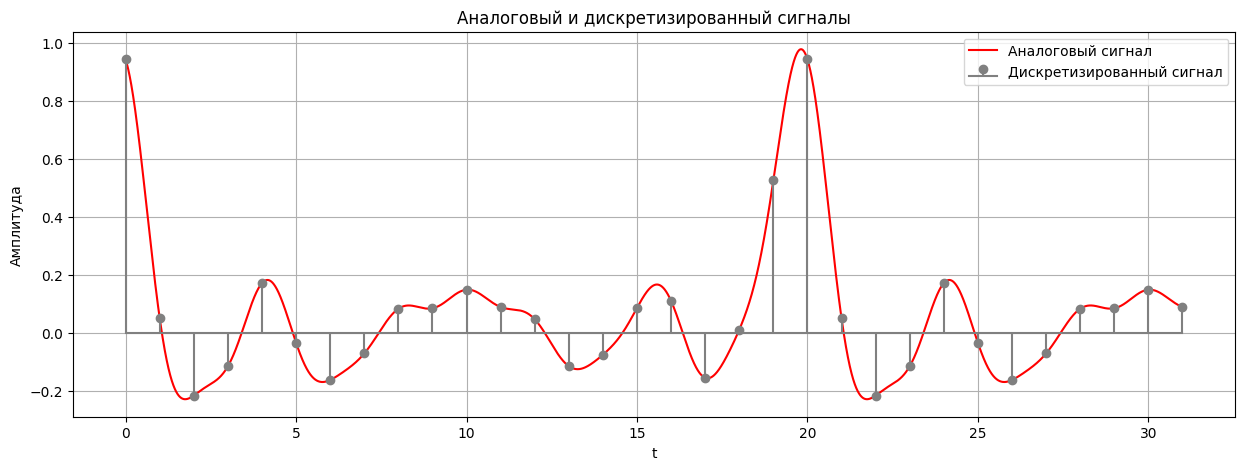

In [65]:
plt.figure(figsize=(15, 5))
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Амплитуда')

plt.title('Аналоговый и дискретизированный сигналы')
plt.plot(atime, asig, 'red', label='Аналоговый сигнал')
plt.stem(dtime, dsig, 'gray', basefmt='gray', label='Дискретизированный сигнал')

plt.legend()
plt.show()

### Задание 3

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

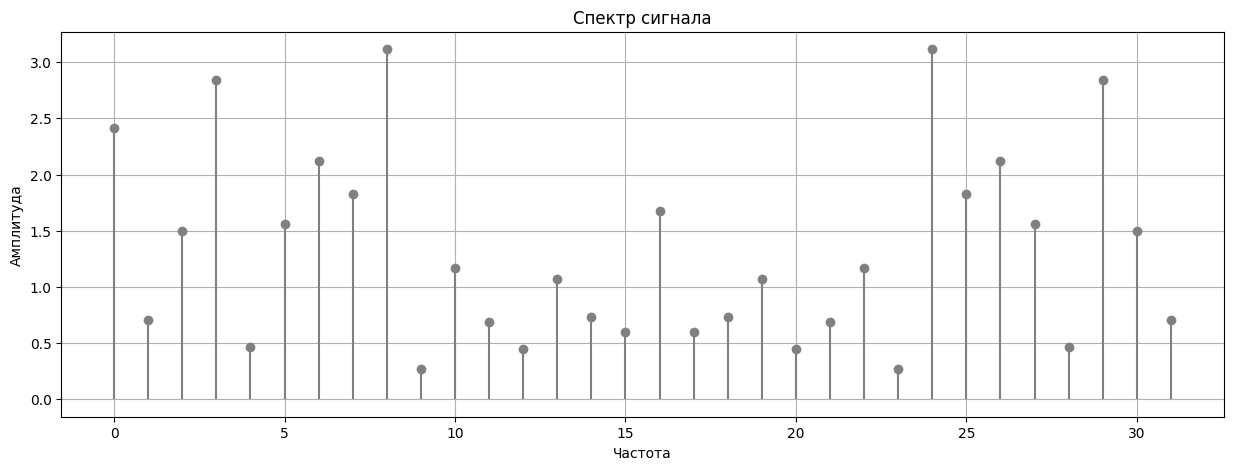

In [66]:
spectrum = np.zeros(N + 1, dtype = 'complex')
for k in range(N + 1):
    for m in range(N + 1):
        spectrum[k] += dsig[m] * np.exp(- 2 * np.pi * 1j * m * k / (N+1))

plt.figure(figsize=(15, 5))
plt.title('Спектр сигнала')
plt.grid(True)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.stem(np.abs(spectrum), linefmt='gray', markerfmt='gray', basefmt=' ')
plt.show()

### Задание 4

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Когда $2n+1=5$

$H(\omega) = \frac{1}{5} (1 + 2 \cos(\omega) + 2 \cos(2\omega))$

Когда $2n+1=9$

$H(\omega) = \frac{1}{9} (1 + 2 \cos(\omega) + 2 \cos(2\omega) + 2 \cos(3\omega)+ 2 \cos(4\omega))$

In [67]:
smooth_5 = np.zeros_like(dsig)
smooth_5[0:2] = dsig[0:2]
smooth_5[-2:] = dsig[-2:]
smooth_5[2: -2] = (dsig[0:-4] + dsig[1:-3] + dsig[2:-2] + dsig[3:-1] + dsig[4:]) / 5

smooth_9 = np.zeros_like(dsig)
smooth_9[0:4] = dsig[0:4]
smooth_9[-4:] = dsig[-4:]
smooth_9[4: -4] = (dsig[0:-8] + dsig[1:-7] + dsig[2:-6] + dsig[3:-5] +
                   dsig[4:-4] + dsig[5:-3] + dsig[6:-2] + dsig[7:-1] +
                   dsig[8:]) / 9

### Задание 5

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

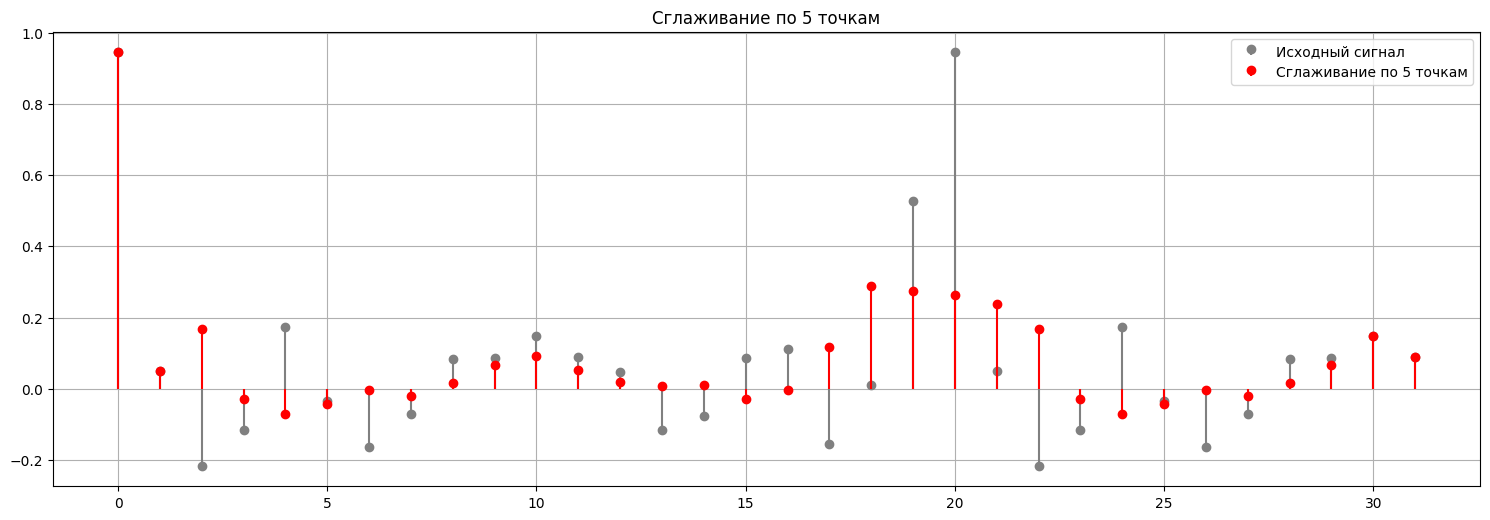

In [68]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(dtime, dsig, 'gray', label='Исходный сигнал',  basefmt=" ")
plt.stem(dtime, smooth_5, 'r', label='Сглаживание по 5 точкам', markerfmt='r', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Сглаживание по 5 точкам')

plt.tight_layout()
plt.show()

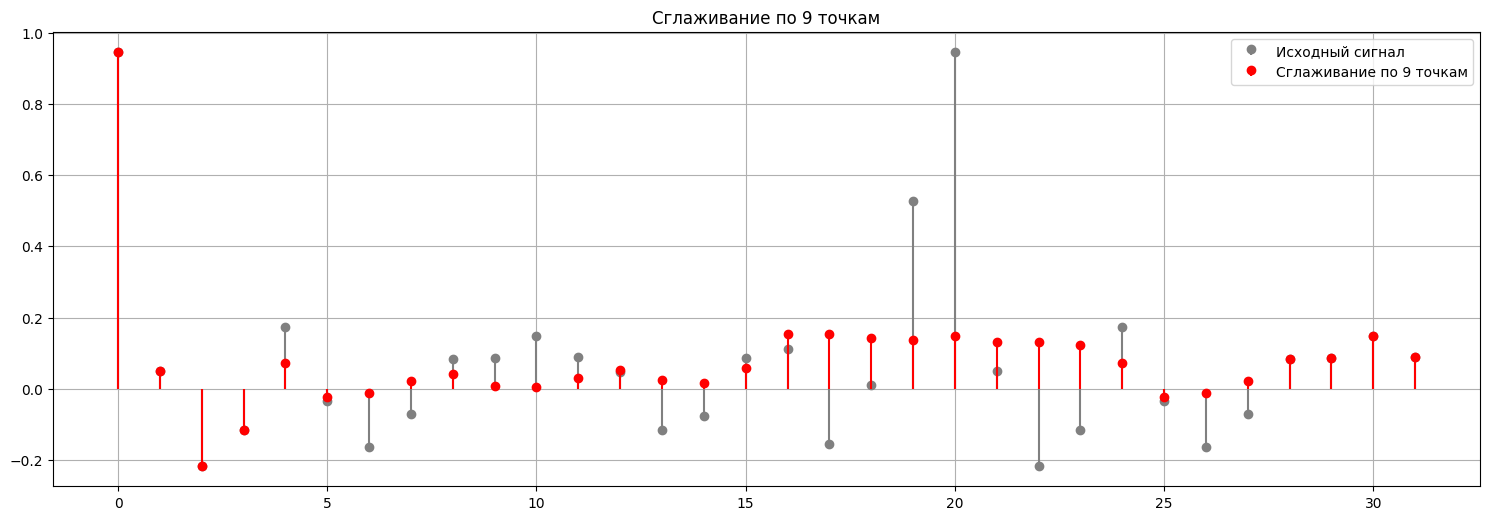

In [69]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(dtime, dsig, 'gray', label='Исходный сигнал',  basefmt=" ")
plt.stem(dtime, smooth_9, 'r', label='Сглаживание по 9 точкам', markerfmt='r', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Сглаживание по 9 точкам')

plt.tight_layout()
plt.show()

### Задание 6

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.


In [70]:
spectrum_smoothed_5 = np.zeros(N + 1, dtype = 'complex')
spectrum_smoothed_9 = np.zeros(N + 1, dtype = 'complex')

for k in range(N + 1):
    for m in range(N + 1):
        spectrum_smoothed_5[k] += smooth_5[m] * np.exp(- 2 * np.pi * 1j * m * k / (N+1))
        spectrum_smoothed_9[k] += smooth_9[m] * np.exp(- 2 * np.pi * 1j * m * k / (N+1))

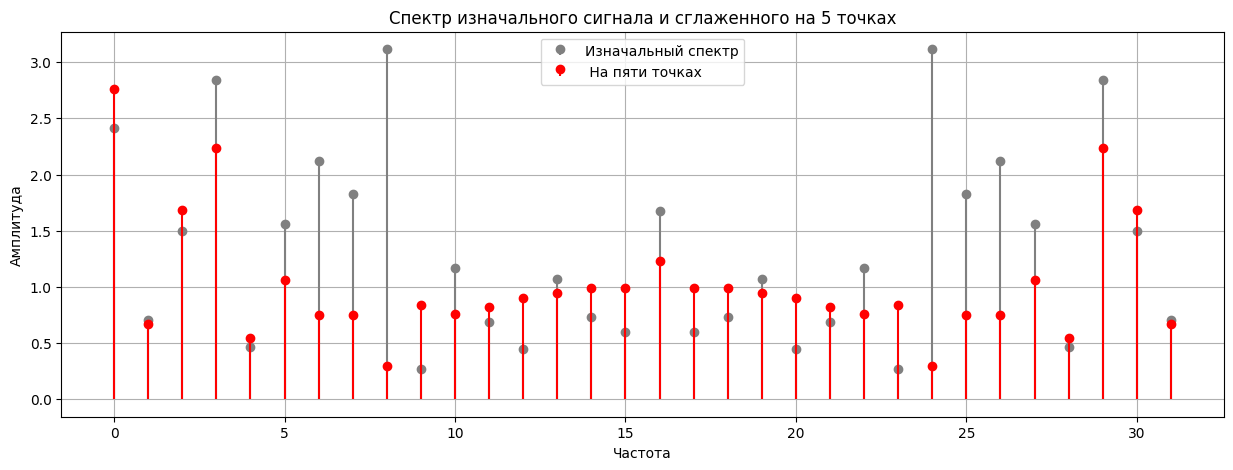

In [71]:
plt.figure(figsize=(15, 5))
plt.title('Спектр изначального сигнала и сглаженного на 5 точках')
plt.grid(True)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.stem(np.abs(spectrum), linefmt='gray',
         markerfmt='gray', basefmt=' ', label='Изначальный спектр')

plt.stem(np.abs(spectrum_smoothed_5), linefmt='red',
         markerfmt='red', basefmt=' ', label=' На пяти точках')
plt.legend()
plt.show()

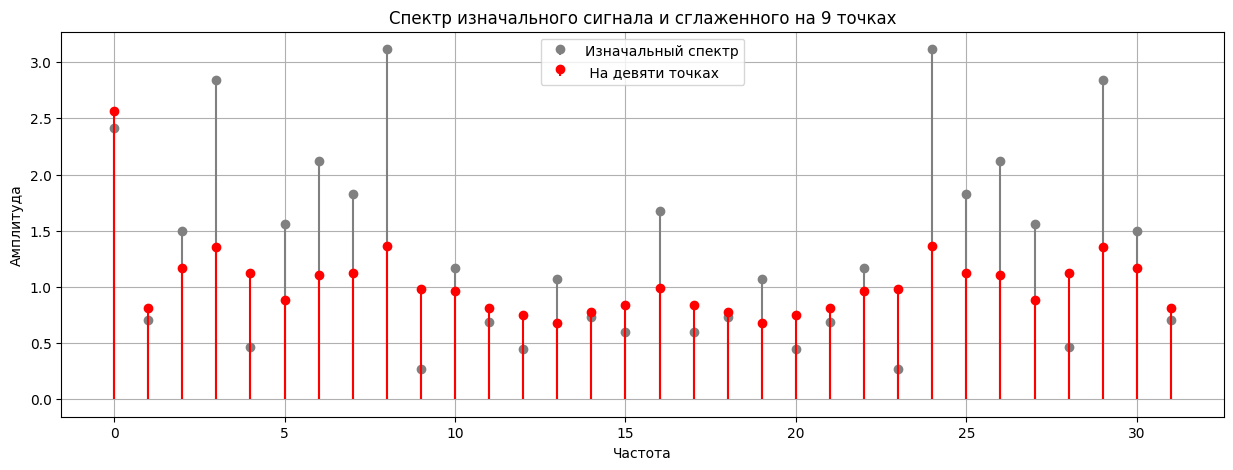

In [72]:
plt.figure(figsize=(15, 5))
plt.title('Спектр изначального сигнала и сглаженного на 9 точках')
plt.grid(True)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.stem(np.abs(spectrum), linefmt='gray',
         markerfmt='gray', basefmt=' ', label='Изначальный спектр')

plt.stem(np.abs(spectrum_smoothed_9), linefmt='red',
         markerfmt='red', basefmt=' ', label=' На девяти точках')
plt.legend()
plt.show()

### Задание 7

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

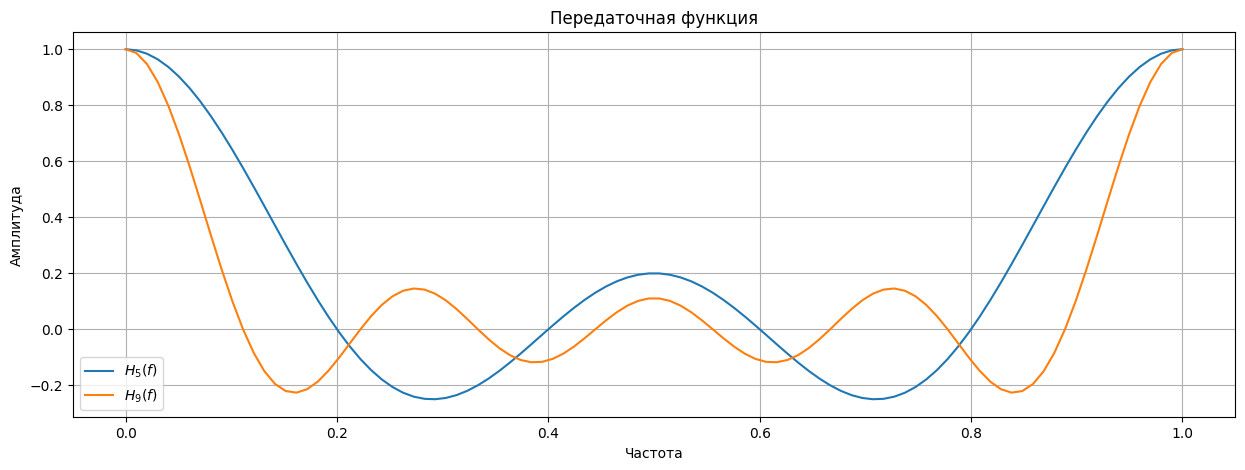

In [113]:
t = np.linspace(0, 1, 100)
f = 2 * np.pi * np.linspace(0, 1, 100)

H_5 = (1 + 2 * (np.cos(f) + np.cos(2 * f))) / 5
H_9 = (1 + 2 * (np.cos(f) + np.cos(2 * f) + np.cos(3 * f) + np.cos(4 * f))) / 9

plt.figure(figsize=(15, 5))
plt.title("Передаточная функция")
plt.ylabel('Амплитуда')
plt.xlabel('Частота')
plt.grid(True)
plt.plot(t, H_5, label = "$H_5(f)$")
plt.plot(t, H_9, label = "$H_9(f)$")
plt.legend()
plt.show()

Из графиков передаточных функций видно, что частоты около нуля не подавляются, далее при увеличение частоты подавление становится сильнее, причем при 9 точках подавление более резкое, а после передаточная функция начинает колебаться. Что соответствует полученным ранее графикам.

### Задание 8

Повторить п. 4–7 для следующих фильтров:
- Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
- Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

#### Сглаживание полиномом 2-ой степени по 5 и 9 узлам.

Случай, когда $2n+1=5$

$y_t = \frac{1}{35}\sum\limits_{k=t-2}^{t+2} (17-5k^2) s_k$

$H(\omega) = \frac{1}{35} (17 + 24 \cos(\omega) - 6 \cos(2\omega))$

Случай, когда $2n+1=9$

$y_t = \frac{1}{231}\sum\limits_{k=t-3}^{t+3} (59-5k^2) s_k$

$H(\omega) = \frac{1}{231} (59 + 108 \cos(\omega) + 78 \cos(2\omega) + 28 \cos(3\omega) - 42 \cos(4\omega))$

In [77]:
smooth_5 = np.zeros_like(dsig)
smooth_5[0:2] = dsig[0:2]
smooth_5[-2:] = dsig[-2:]
smooth_5[2: -2] = ((-3) * dsig[0:-4] + (12) * dsig[1:-3] +
                   17 * dsig[2:-2] +
                   (12) * dsig[3:-1] + (-3) * dsig[4:]) / 35

smooth_9 = np.zeros_like(dsig)
smooth_9[0:4] = dsig[0:4]
smooth_9[-4:] = dsig[-4:]
smooth_9[4: -4] = (-21 * dsig[0:-8] + 14 * dsig[1:-7] +
                   39 * dsig[2:-6] + 54 * dsig[3:-5] +
                   59 * dsig[4:-4] +
                   54 * dsig[5:-3] + (39) * dsig[6:-2] +
                   (14) * dsig[7:-1] + (-21) * dsig[8:]) / 231

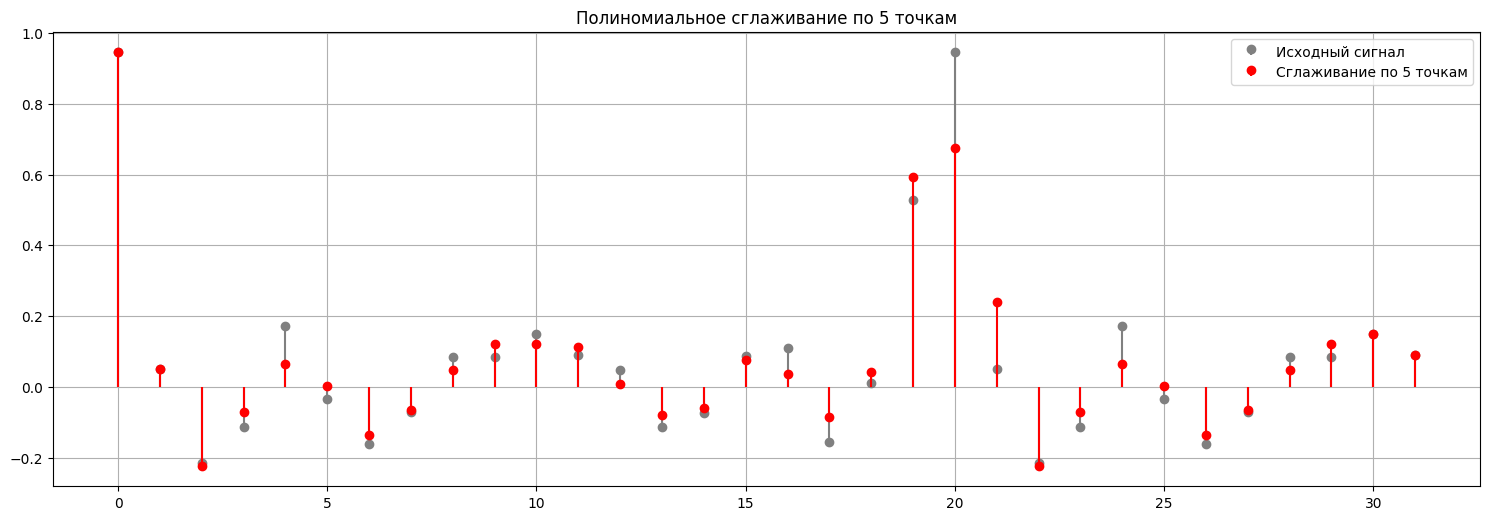

In [78]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(dtime, dsig, 'gray', label='Исходный сигнал',  basefmt=" ")
plt.stem(dtime, smooth_5, 'r', label='Сглаживание по 5 точкам', markerfmt='r', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Полиномиальное сглаживание по 5 точкам')

plt.tight_layout()
plt.show()

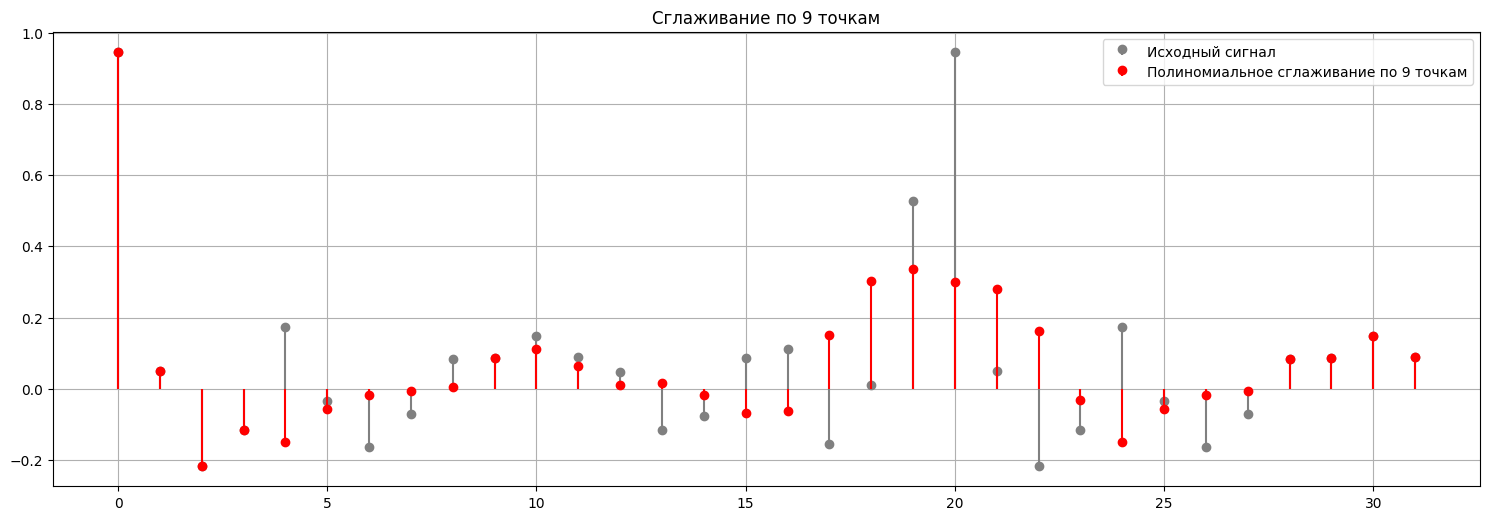

In [79]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(dtime, dsig, 'gray', label='Исходный сигнал',  basefmt=" ")
plt.stem(dtime, smooth_9, 'r', label='Полиномиальное сглаживание по 9 точкам', markerfmt='r', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Сглаживание по 9 точкам')

plt.tight_layout()
plt.show()

In [80]:
spectrum_smoothed_5 = np.zeros(N + 1, dtype = 'complex')
spectrum_smoothed_9 = np.zeros(N + 1, dtype = 'complex')

for k in range(N + 1):
    for m in range(N + 1):
        spectrum_smoothed_5[k] += smooth_5[m] * np.exp(- 2 * np.pi * 1j * m * k / (N+1))
        spectrum_smoothed_9[k] += smooth_9[m] * np.exp(- 2 * np.pi * 1j * m * k / (N+1))

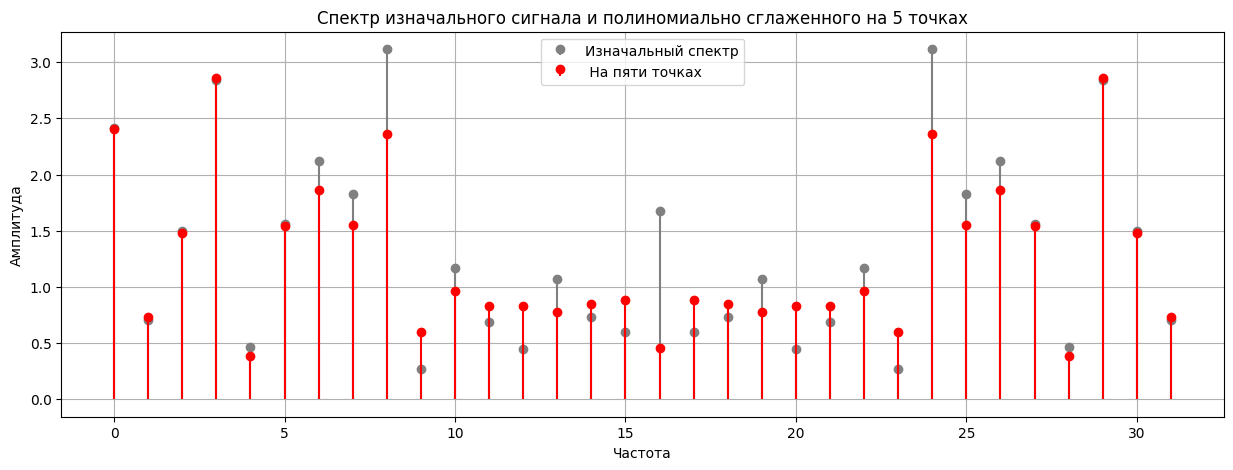

In [81]:
plt.figure(figsize=(15, 5))
plt.title('Спектр изначального сигнала и полиномиально сглаженного на 5 точках')
plt.grid(True)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.stem(np.abs(spectrum), linefmt='gray',
         markerfmt='gray', basefmt=' ', label='Изначальный спектр')

plt.stem(np.abs(spectrum_smoothed_5), linefmt='red',
         markerfmt='red', basefmt=' ', label=' На пяти точках')
plt.legend()
plt.show()

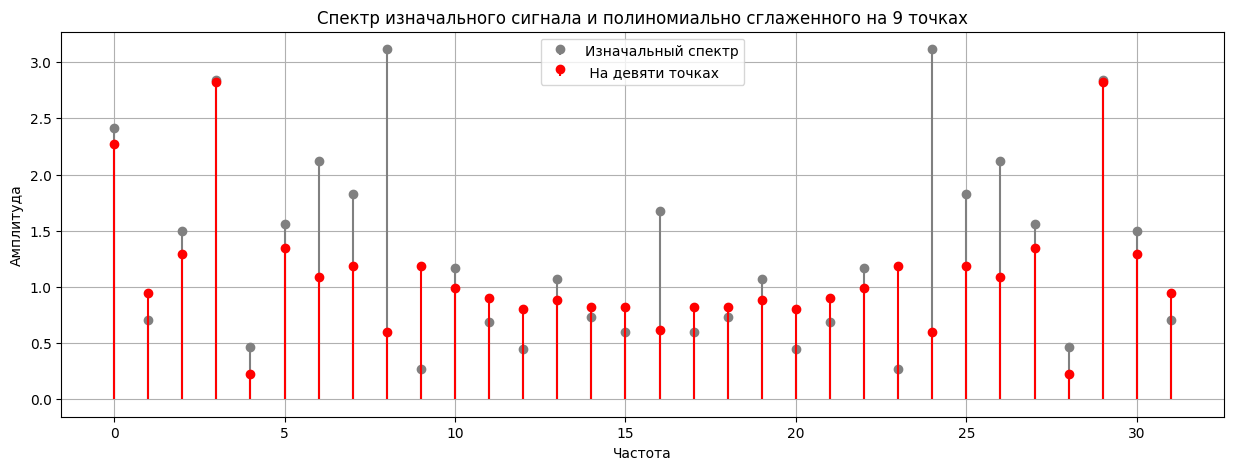

In [82]:
plt.figure(figsize=(15, 5))
plt.title('Спектр изначального сигнала и полиномиально сглаженного на 9 точках')
plt.grid(True)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.stem(np.abs(spectrum), linefmt='gray',
         markerfmt='gray', basefmt=' ', label='Изначальный спектр')

plt.stem(np.abs(spectrum_smoothed_9), linefmt='red',
         markerfmt='red', basefmt=' ', label=' На девяти точках')
plt.legend()
plt.show()

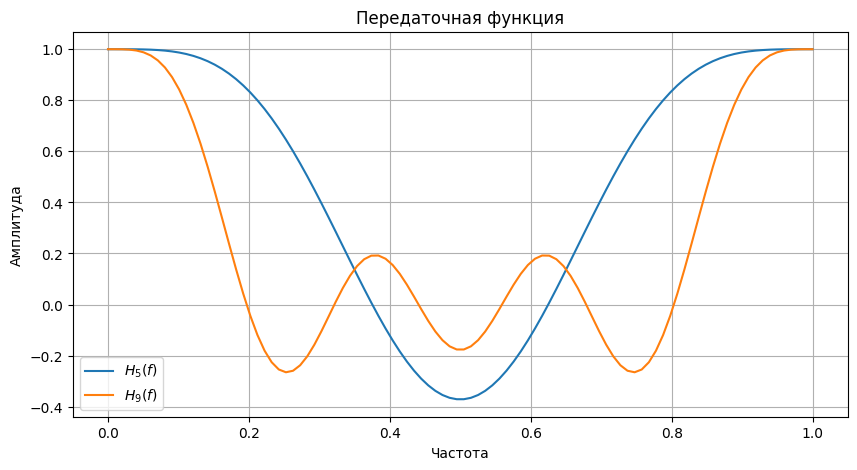

In [112]:
t = np.linspace(0, 1, 100)
f = 2 * np.pi * np.linspace(0, 1, 100)

H_5 = (17 + 24 * np.cos(f) - 6 * np.cos(2 * f)) / 35
H_9 = (59 + 108 * np.cos(f) + 78 * np.cos(2 * f) + 28 * np.cos(3 * f) - 42 * np.cos(4 * f)) / 231

plt.figure(figsize=(10, 5))
plt.title("Передаточная функция")
plt.ylabel('Амплитуда')
plt.xlabel('Частота')
plt.grid(True)
plt.plot(t, H_5, label = "$H_5(f)$")
plt.plot(t, H_9, label = "$H_9(f)$")
plt.legend()
plt.show()

Из графиков передаточных функций видно, что частоты около нуля не подавляются, далее при увеличение частоты подавление становится сильнее, причем при 9 точках подавление более резкое, также для 9 точек передаточная функция начинает колебаться. Что соответствует полученным ранее графикам.

#### Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

Случай, когда $2n+1=7$

$y_t = \frac{1}{924}\sum\limits_{k=t-3}^{t+3} (524 - 245k^2 + 21k^4) s_k$

$H(\omega) = \frac{1}{924} (524 + 600 \cos(\omega) - 240 \cos(2\omega) + 40 cos(3 ω))$

Случай, когда $2n+1=11$

$y_t = \frac{1}{429}\sum\limits_{k=t-5}^{t+5} (572 - 95k^2 + 3 k^4) s_k$

$H(\omega) = \frac{1}{429} (143+ 240 \cos(ω)+ 120 \cos(2ω)- 20 \cos(3ω) -90 \cos(4ω) + 36 \cos(5ω))$

In [127]:
smooth_7 = np.zeros_like(dsig)
smooth_7[0:3] = dsig[0:3]
smooth_7[-3:] = dsig[-3:]
smooth_7[3: -3] = (20 * dsig[0:-6]
                   - 120 * dsig[1:-5]
                   + 300 * dsig[2:-4]
                   + 524 * dsig[3:-3]
                   + 300 * dsig[4:-2]
                   - 120 * dsig[5:-1]
                   + 20 * dsig[6:]) / 924

smooth_11 = np.zeros_like(dsig)
smooth_11[0:5] = dsig[0:5]
smooth_11[-5:] = dsig[-5:]
smooth_11[5: -5] = (143 * dsig[0:-10]
                    + 120 * dsig[1:-9]
                    + 60 * dsig[2:-8]
                    - 10 * dsig[3:-7]
                    - 45 * dsig[4:-6]
                    + 18 * dsig[5:-5]
                    - 45 * dsig[6:-4]
                    - 10 * dsig[7:-3]
                    + 60 * dsig[8:-2]
                    + 120 * dsig[9:-1]
                    + 143 * dsig[10:]) / 429

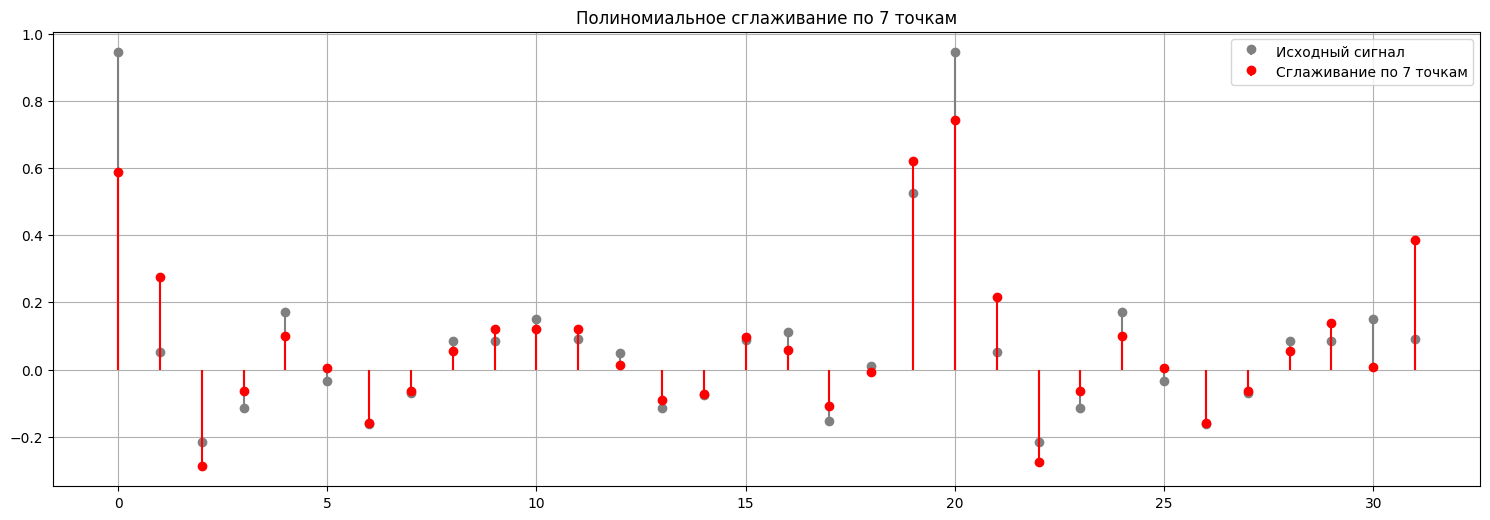

In [128]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(dtime, dsig, 'gray', label='Исходный сигнал',  basefmt=" ")
plt.stem(dtime, smooth_7, 'r', label='Сглаживание по 7 точкам', markerfmt='r', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Полиномиальное сглаживание по 7 точкам')

plt.tight_layout()
plt.show()

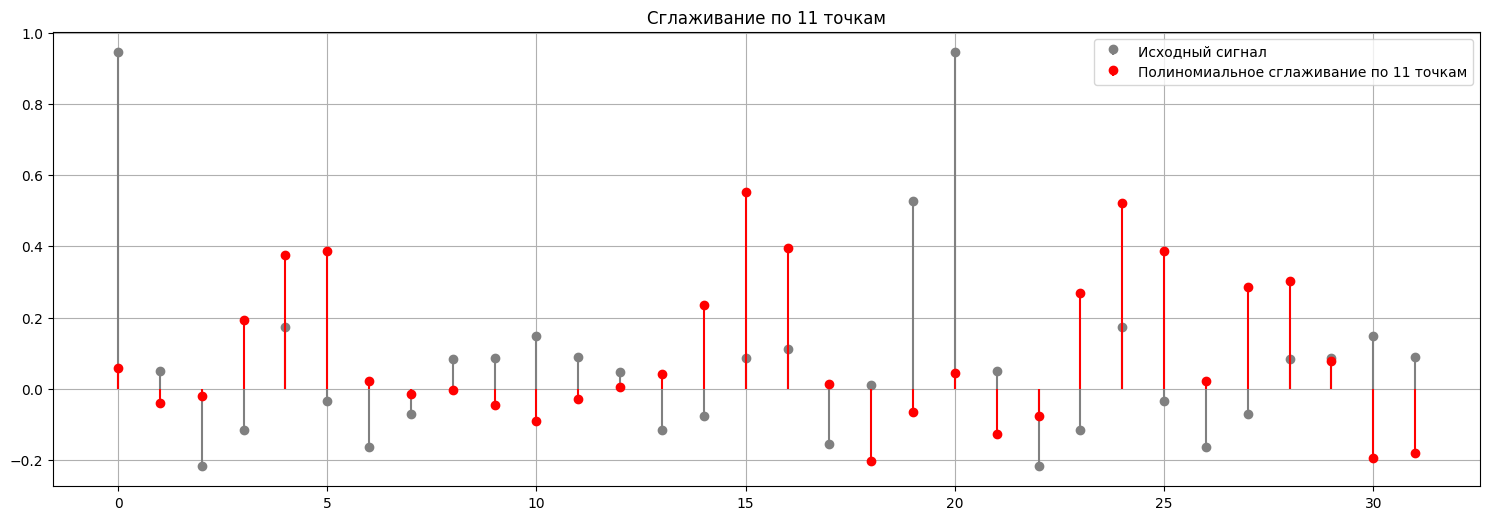

In [129]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(dtime, dsig, 'gray', label='Исходный сигнал',  basefmt=" ")
plt.stem(dtime, smooth_11, 'r', label='Полиномиальное сглаживание по 11 точкам', markerfmt='r', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Сглаживание по 11 точкам')

plt.tight_layout()
plt.show()

In [107]:
spectrum_smoothed_7 = np.zeros(N + 1, dtype = 'complex')
spectrum_smoothed_11 = np.zeros(N + 1, dtype = 'complex')

for k in range(N + 1):
    for m in range(N + 1):
        spectrum_smoothed_7[k] += smooth_7[m] * np.exp(- 2 * np.pi * 1j * m * k / (N+1))
        spectrum_smoothed_11[k] += smooth_11[m] * np.exp(- 2 * np.pi * 1j * m * k / (N+1))

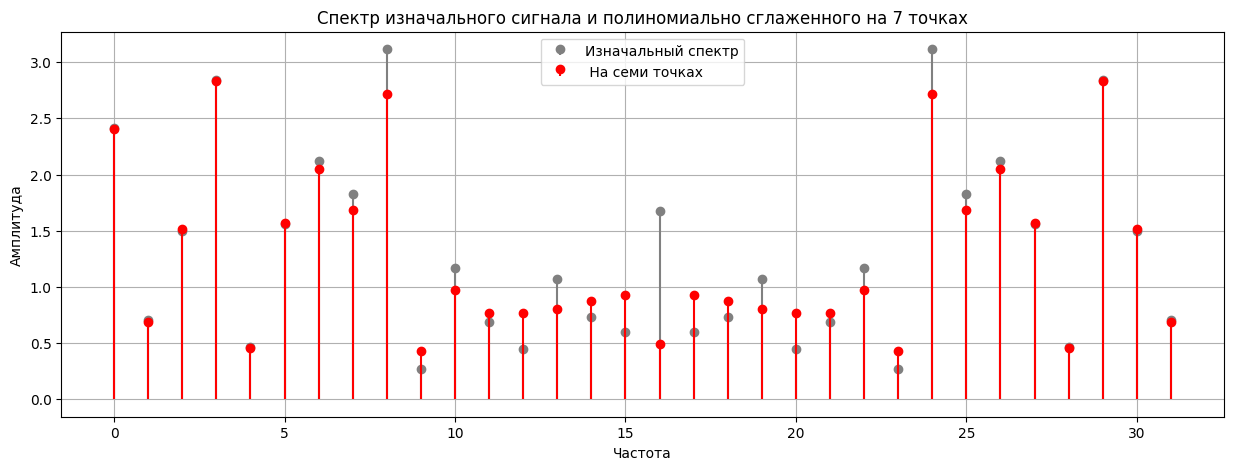

In [130]:
plt.figure(figsize=(15, 5))
plt.title('Спектр изначального сигнала и полиномиально сглаженного на 7 точках')
plt.grid(True)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.stem(np.abs(spectrum), linefmt='gray',
         markerfmt='gray', basefmt=' ', label='Изначальный спектр')

plt.stem(np.abs(spectrum_smoothed_7), linefmt='red',
         markerfmt='red', basefmt=' ', label=' На семи точках')
plt.legend()
plt.show()

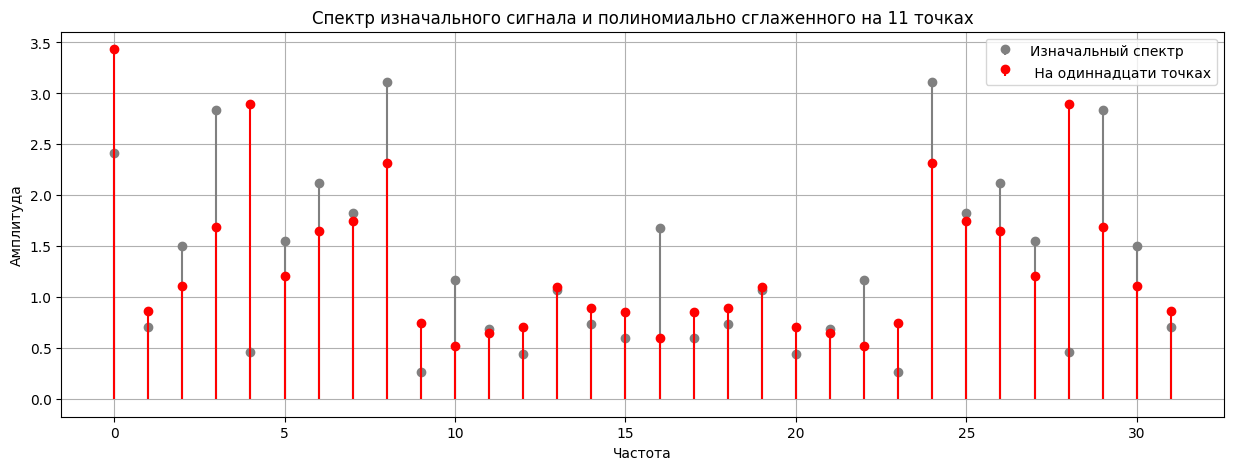

In [131]:
plt.figure(figsize=(15, 5))
plt.title('Спектр изначального сигнала и полиномиально сглаженного на 11 точках')
plt.grid(True)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.stem(np.abs(spectrum), linefmt='gray',
         markerfmt='gray', basefmt=' ', label='Изначальный спектр')

plt.stem(np.abs(spectrum_smoothed_11), linefmt='red',
         markerfmt='red', basefmt=' ', label=' На одиннадцати точках')
plt.legend()
plt.show()

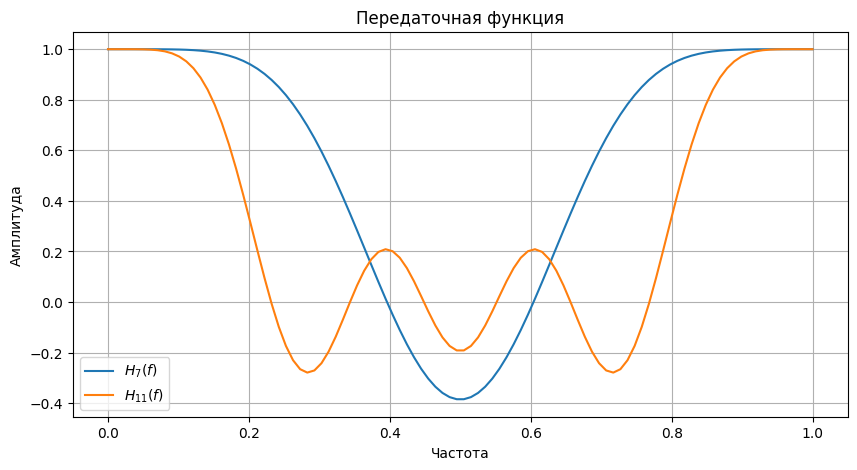

In [116]:
t = np.linspace(0, 1, 100)
f = 2 * np.pi * np.linspace(0, 1, 100)

H_7 = (524 + 600 * np.cos(f) - 240 * np.cos(2 * f) + 40 * np.cos(3 * f)) / 924
H_11 = (143 + 240 * np.cos(f) + 120 * np.cos(2 * f) - 20 * np.cos(3 * f) - 90 * np.cos(4 * f) + 36 * np.cos(5 * f)) / 429

plt.figure(figsize=(10, 5))
plt.title("Передаточная функция")
plt.ylabel('Амплитуда')
plt.xlabel('Частота')
plt.grid(True)
plt.plot(t, H_7, label = "$H_7(f)$")
plt.plot(t, H_11, label = "$H_{11}(f)$")
plt.legend()
plt.show()

Из графиков передаточных функций видно, что частоты около нуля не подавляются, далее при увеличение частоты подавление становится сильнее, причем при 11 точках подавление более резкое, также для 11 точек передаточная функция начинает колебаться. Что соответствует полученным ранее графикам.

## Выводы



Было проведено сглаживание изначального сигнала по разному числу узлов. После применения линейных и полноминальных фильтров, получены спектры для изначального и отфильтрованного сигнала с использованием ДПФ.
При сравнении результатов и передаточных функций выявлено соответствие.